# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [51]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np


#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 20

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

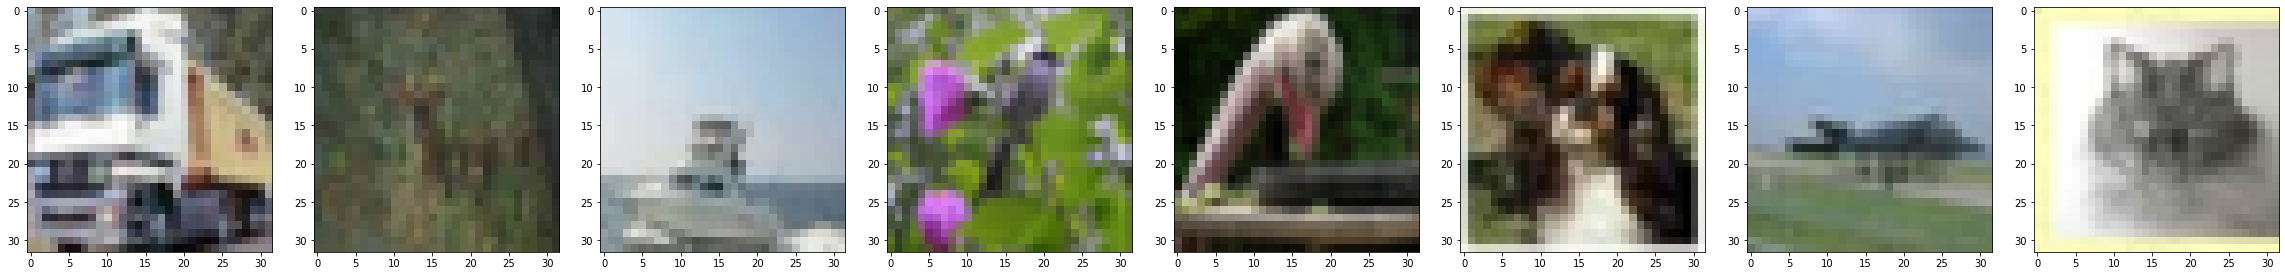

In [16]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(1,8, figsize=(32,32))
fig.tight_layout()

axarr[0].imshow(x_train[1,:]);
axarr[1].imshow(x_train[10,:]);
axarr[2].imshow(x_train[100,:]);
axarr[3].imshow(x_train[300,:]);
axarr[4].imshow(x_train[400,:]);
axarr[5].imshow(x_train[500,:]);
axarr[6].imshow(x_train[600,:]);
axarr[7].imshow(x_train[1700,:]);

In [17]:
# Let's say we expect our inputs to be RGB images of arbitrary size
inputs = keras.Input(shape=(32,32,3))

In [68]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
# Center-crop images to 150x150
#l1 = CenterCrop(height=150, width=150)(inputs)
# Rescale images to [0, 1]
l2 = Rescaling(scale=1.0 / 255)(inputs)

# Apply some convolution and pooling layers
l3 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l2)
l4 = layers.MaxPooling2D(pool_size=(3, 3),strides=(1,1))(l3)
l5 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l4)
l6 = layers.MaxPooling2D(pool_size=(2, 2),strides=(1,1))(l5)
l7 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(l6)
l8 = layers.MaxPooling2D(pool_size=(2, 2),strides=(1,1))(l7)
l9 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(l8)
# Apply global average pooling to get flat feature vectors
l10 = layers.GlobalAveragePooling2D()(l9)

# Add a dense classifier on top
num_classes = 10
outputs = layers.Dense(num_classes, activation="softmax")(l10)

In [69]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [70]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 23, 23, 64)        1849

In [71]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [72]:
my_model = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs,shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1108 - accuracy: 0.2044
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8199 - accuracy: 0.3068
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7270 - accuracy: 0.3507
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6641 - accuracy: 0.3769
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6115 - accuracy: 0.4009
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5692 - accuracy: 0.4196
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5327 - accuracy: 0.4406
Epoch 8/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4931 - accuracy: 0.4599
Epoch 9/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4612 - accuracy: 0.4707
Epoch 10/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.42

In [45]:
my_model.history

{'loss': [1.8375173807144165,
  1.5924931764602661,
  1.4806556701660156,
  1.399851679801941,
  1.341361403465271,
  1.2958101034164429,
  1.2542792558670044,
  1.2201977968215942,
  1.189018964767456,
  1.163227915763855]}

In [60]:
predictions = model.predict(x_train[20000:30000,:,:,:])
print(predictions.shape)

(10000, 10)


In [61]:
predictions[0,:]

array([2.60398418e-01, 1.50788273e-03, 2.67756313e-01, 3.67383496e-03,
       1.16895065e-02, 4.84021241e-03, 6.12931550e-02, 2.88524657e-01,
       1.00309841e-01, 6.13833527e-06], dtype=float32)

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(my_model, x_test, y_test)  

TypeError: ignored